# Part 1: Obtaining Time Series Data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  simple lineplots of the data. Artificial Data

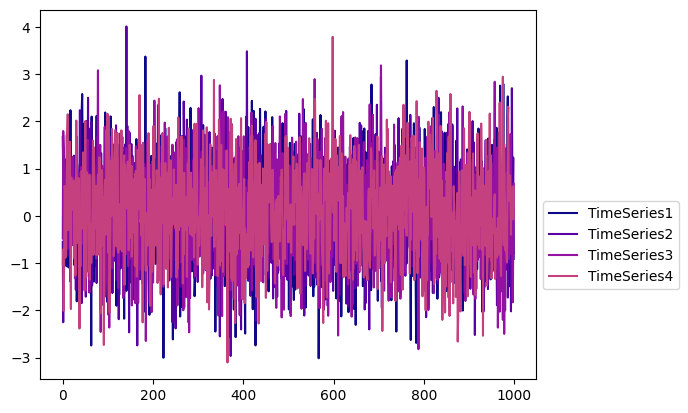

In [2]:
np.random.seed(1)
n_obs = 1000
n_assets = 4

artificial_returns = np.random.randn(n_obs, n_assets) + 0.05
artificial_returns

colors=plt.cm.plasma(np.linspace(0,3,20))
for i in range(artificial_returns.shape[1]):
    plt.plot(artificial_returns.T[i], color=colors[i], label='TimeSeries{}'.format(i+1))
plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
plt.show()

# """ac1=artificial_returns[:,0]
# ac2=artificial_returns[:,1]
# ac3=artificial_returns[:,2]
# ac4=artificial_returns[:,3]
# #plt.plot(range(len(ac1)),ac1,'r', range(len(ac1)),ac2, 'g', range(len(ac1)),ac3, 'b',range(len(ac1)),ac4,'y')
# plt.plot(range(len(ac1)),ac1, label="timeseries")
# plt.legend(loc='best', bbox_to_anchor=(1.0,0.5))
# # plt.grid()range(len(ac1)),ac4,''
# # plt.ylabel('daily stcok returns')
# # plt.xlabel('days')
# plt.show()"""


# The cumulative sum provides a comparative description of the observed time series.

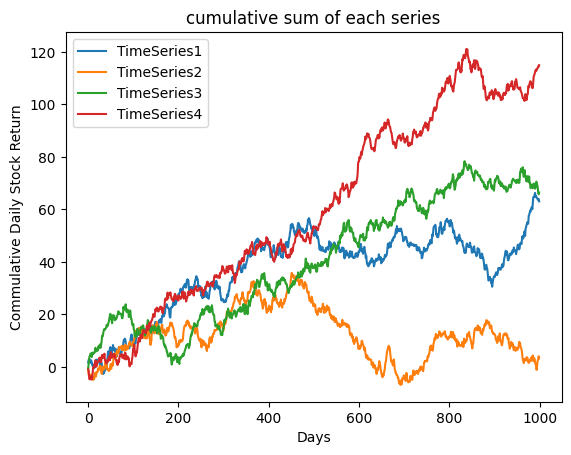

In [3]:
colors=plt.cm.plasma(np.linspace(0,3,20))

for i in range(artificial_returns.shape[1]):
    plt.plot(artificial_returns.T[i].cumsum(), label="TimeSeries{}".format(i+1))
plt.legend(loc='best')
plt.title('cumulative sum of each series')
plt.ylabel('Commulative Daily Stock Return')
plt.xlabel('Days')
plt.show()


# """values, base = np.histogram(ac1, bins=range(len(ac1)))

# #evaluate the cumulative
# cumulative1 = np.cumsum(ac1)
# cumulative2 = np.cumsum(ac2)
# cumulative3 = np.cumsum(ac3)
# cumulative4 = np.cumsum(ac4)
# # plot the cumulative function
# plt.plot(range(len(ac1)),cumulative1, range(len(ac1)),cumulative2, range(len(ac1)),cumulative3, range(len(ac1)),cumulative4)
# # plt.plot(range(len(ac1)), cumulative1,label='timeseries1')
# # plt.plot(range(len(ac1)), cumulative2,label='timeseries2')
# # plt.plot(range(len(ac1)), cumulative3,label='timeseries3')
# # plt.plot(range(len(ac1)), cumulative4,label='timeseries4')
                                    
# plt.title('cumulative sum of each series')
# plt.ylabel('Commulative Daily Stock Return')
# plt.xlabel('Days')
# plt.show()
# """

# Download Economic Time Series Data

In [5]:
import pandas as pd

tickers = list(pd.read_csv('./data/SP100_LIST.csv', sep=';')['Symbol'])
provider = 'yahoo'
start = '2010-01-01'
end = '2017-11-14'

data = pd.read_csv('./data/data_sp100.csv', sep=';', index_col=0, header=0, parse_dates=True)
data.head()

,AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,AXP,...,UNP,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,26.986492,NaN,21.011253,34.577480,38.728325,23.313679,25.275532,49.492962,134.520004,35.931217,...,27.156313,45.483036,19.122402,57.742420,18.287632,21.048664,31.049047,22.251017,43.785145,53.863396
2010-01-04,27.406532,NaN,21.194162,35.052402,39.393185,23.243692,25.586843,50.499107,133.899994,36.285904,...,27.789530,46.125214,19.436718,59.589233,18.429817,21.143955,31.539467,22.523083,44.424107,54.621700
2010-01-05,27.453915,NaN,21.022924,35.269032,39.002094,22.808218,26.007540,50.061653,134.690002,36.206097,...,28.176256,46.204498,19.929434,58.699112,18.218628,21.182079,31.285799,23.141388,43.981754,54.834965
2010-01-06,27.017223,NaN,21.139675,35.643974,39.129196,22.660460,26.015955,49.685444,132.250000,36.791367,...,28.218761,45.863583,20.141808,58.391304,17.973986,20.573015,31.049047,23.174374,43.883450,55.308914
2010-01-07,26.967278,NaN,21.314800,35.610645,38.816319,22.224985,26.150579,49.230499,130.000000,37.388069,...,27.968023,45.514767,20.532579,58.640884,18.141272,20.450558,31.235058,24.015276,43.908028,55.135132


In [25]:
companies = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'GOOGL', 'XOM', 'V', 'PG']

 
# calculate returns
returns = data[companies] / data[companies].shift(1) - 1
returns = returns.fillna(method='ffill').dropna()
returns.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1808\1111656875.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  returns = returns.fillna(method='ffill').dropna()


,AAPL,MSFT,JNJ,JPM,GOOGL,XOM,V,PG
Date,,,,,,,,
2010-01-04,0.015565,0.015420,0.004192,0.029554,0.010920,0.014078,0.007775,0.008082
2010-01-05,0.001729,0.000323,-0.011595,0.019369,-0.004404,0.003904,-0.011459,0.000327
2010-01-06,-0.015906,-0.006137,0.008133,0.005495,-0.025209,0.008643,-0.013428,-0.004743
2010-01-07,-0.001849,-0.010400,-0.007137,0.019808,-0.023280,-0.003142,0.009307,-0.005423
2010-01-08,0.006648,0.006897,0.003438,-0.002456,0.013331,-0.004011,0.002766,-0.001322


# Part 2: Modern Portfolio Theory with Python

# Building Available Market Portfolios

In [9]:
def create_random_weights(n_assets):
    '''
    returns randomly choosen portfolio weights that sum to one
    '''
    w = np.random.rand(n_assets)
    return w / w.sum()
 
def evaluate_random_portfolio(returns):
    ''' 
    returns the mean and standard deviation of returns for a random portfolio
    '''
    # in case a resampler is used
    returns = pd.DataFrame(returns)   
    
    # calculate from covariance, asset returns and weights
    cov = np.matrix(returns.cov())
    R = np.matrix(returns.mean())
    w = np.matrix(create_random_weights(returns.shape[1]))
    
    # calculate expected portfolio return and risk
    mu = w * R.T
    sigma = np.sqrt(w * cov * w.T)
    
    return mu, sigma
 
def create_random_portfolios(returns, n_portfolios=1500):
    '''
    plots randomly created portfolios
    '''
    # calculate mean and std for every portfolio
    pf_mus, pf_sigmas = np.column_stack([evaluate_random_portfolio(returns) for _ in range(n_portfolios)])
 
    return pf_mus, pf_sigmas

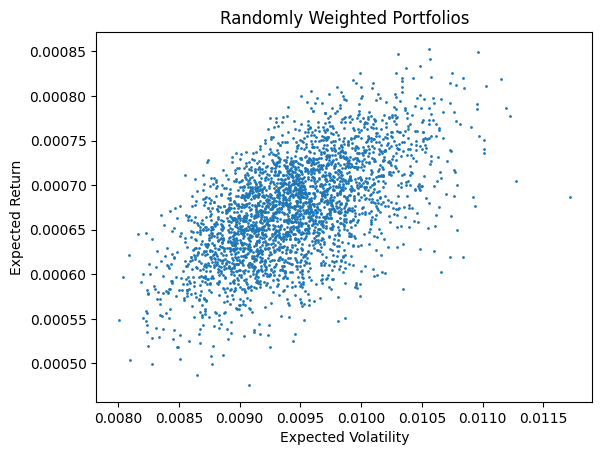

In [ ]:
pf_mus, pf_sigmas = create_random_portfolios(returns, n_portfolios=3000)
 
# scatter plot for expected return and volatility
plt.plot(pf_sigmas, pf_mus, 'o', markersize=1)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Randomly Weighted Portfolios')
plt.show()

#Ce code va générer 3 000 portefeuilles aléatoires composés des actions ['AAPL', 'MSFT', 'JNJ', 'JPM', 'GOOGL', 'XOM', 'V', 'PG'] et calculer pour chacun leur rendement et volatilité



# Part 3: Efficient Market Frontier

# Using Quadratic Programming

In [11]:
!pip install cvxopt

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
    --------------------------------------- 0.3/12.8 MB 2.8 MB/s eta 0:00:05
   - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/12.8 MB 3.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/12.8 MB 3.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.8 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.8 MB 3.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.8 MB 3.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.8 MB 3.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.8 MB 3.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.8 MB 3.5 MB/s eta 0:00:04
   --- ------

In [27]:
import cvxopt as opt
from cvxopt import solvers
 
def calculate_frontier(returns):
    '''
    returns optimal portfolio weights and corresponding sigmas for a desired optimal portfolio return
    Params:
    - returns: T x N matrix of observed data
    '''
    returns = pd.DataFrame(returns)
    cov = np.matrix(np.cov(returns.T))
    N = returns.shape[1]
    pbar = np.matrix(returns.mean())
    
    # define list of optimal / desired mus for which we'd like to find the optimal sigmas
    optimal_mus = []
    r_min = pbar.mean()    # minimum expected return
    for i in range(50):
        optimal_mus.append(r_min)
        r_min += (pbar.mean() / 100)
    
    # constraint matrices for quadratic programming
    P = opt.matrix(cov)
    q = opt.matrix(np.zeros((N, 1)))
    G = opt.matrix(np.concatenate((-np.array(pbar), -np.identity(N)), 0))
    A = opt.matrix(1.0, (1,N))
    b = opt.matrix(1.0)
    
    # hide optimization
    opt.solvers.options['show_progress'] = False
    
    # calculate portfolio weights, every weight vector is of size Nx1
    # find optimal weights with qp(P, q, G, h, A, b)
    optimal_weights = [solvers.qp(P, q, G, opt.matrix(np.concatenate((-np.ones((1, 1)) * mu, np.zeros((N, 1))), 0)), A, b)['x'] for mu in optimal_mus]
    
    # find optimal sigma
    # \sigma = w^T * Cov * w
    optimal_sigmas = [np.sqrt(np.matrix(w).T * cov.T.dot(np.matrix(w)))[0,0] for w in optimal_weights]
    
    return optimal_weights, optimal_mus, optimal_sigmas


# Simulated Data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1808\1508073599.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y-o" (-> color='y'). The keyword argument will take precedence.
  plt.plot(optimal_sigmas, optimal_mus, 'y-o', color='orange', markersize=8, label='Efficient Frontier')


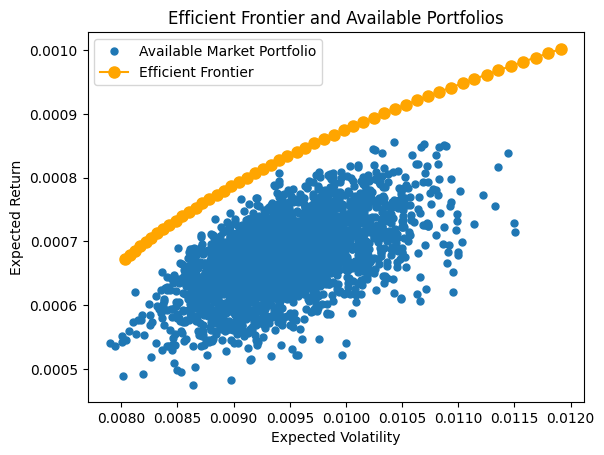

In [36]:
pf_mus, pf_sigmas = create_random_portfolios(returns, n_portfolios=3000)
optimal_weights, optimal_mus, optimal_sigmas = calculate_frontier(returns)
with open("optimal_weights.txt", "w") as f:
    for j in range(50):
        weights_percent = np.round(np.array(optimal_weights[j]).flatten() * 100, 2)
        f.write("--------------------------------------------------\n")
        f.write(f"Portfolio {j+1} (Target return: {optimal_mus[j]:.4f}):\n")
        for i, w in enumerate(weights_percent):
            f.write(f"{companies[i]} : {w:.2f} %\n")
plt.plot(pf_sigmas, pf_mus, 'o', markersize=5, label='Available Market Portfolio')
plt.plot(optimal_sigmas, optimal_mus, 'y-o', color='orange', markersize=8, label='Efficient Frontier')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Available Portfolios')
plt.legend(loc='best')
plt.show()

# The End.